In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [2]:
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

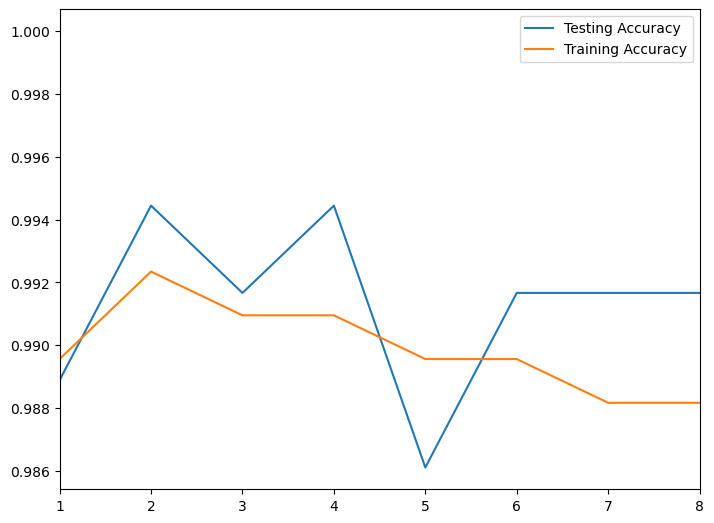

In [3]:
Train_score = []
Test_score = []
for i in range(1, 10):
    
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(X_train, y_train)
    Test_score.append(kNN.score(X_test, y_test))
    Train_score.append(kNN.score(X_train, y_train))
    
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

ax.plot(Test_score, label="Testing Accuracy")
ax.plot(Train_score, label = "Training Accuracy")
ax.set_xlim(1, 8)
ax.legend()

In [5]:
svm_1 = SVC(kernel='linear')
svm_1.fit(X_train, y_train)
y_pred = svm_1.predict(X_test)
print(classification_report(y_test, y_pred))
svm_2 = SVC(kernel='poly')
svm_2.fit(X_train, y_train)
y_pred = svm_2.predict(X_test)
print(classification_report(y_test, y_pred))
svm_3 = SVC(kernel='sigmoid')
svm_3.fit(X_train, y_train)
y_pred = svm_3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        28
           4       0.94      1.00      0.97        32
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        38
           8       0.97      0.95      0.96        39
           9       0.98      0.95      0.97        44

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        38
           3       1.00 

In [6]:
#Out of the tested kernels, the one that performed best is the poly kernel

<Axes: >

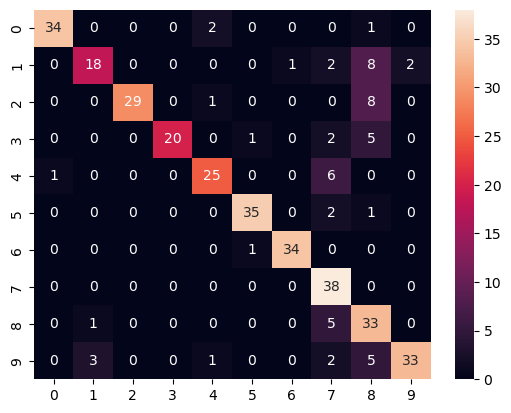

In [7]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
cs = confusion_matrix(y_test, y_pred)
sns.heatmap(cs, annot=True)

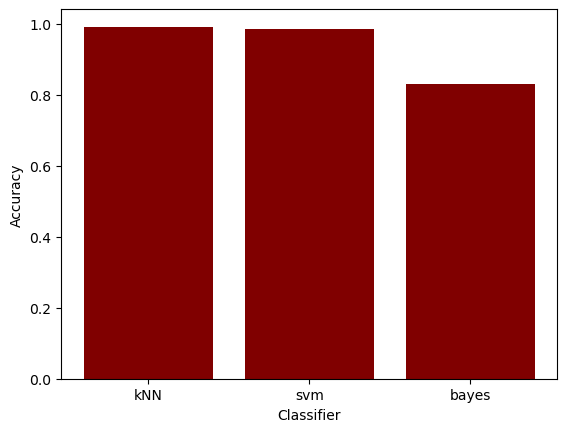

In [9]:
comp = [kNN.score(X_test, y_test), svm_1.score(X_test, y_test), bayes.score(X_test, y_test)]
clas = ['kNN', 'svm', 'bayes']
plt.bar(clas, comp, color = 'maroon') 
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.show()

In [10]:
#Bayes seems to have performed the worst out of the 3 classifiers

C:\Users\educi\AppData\Local\Temp\ipykernel_7204\2236866449.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdYlGn")


<Axes: >

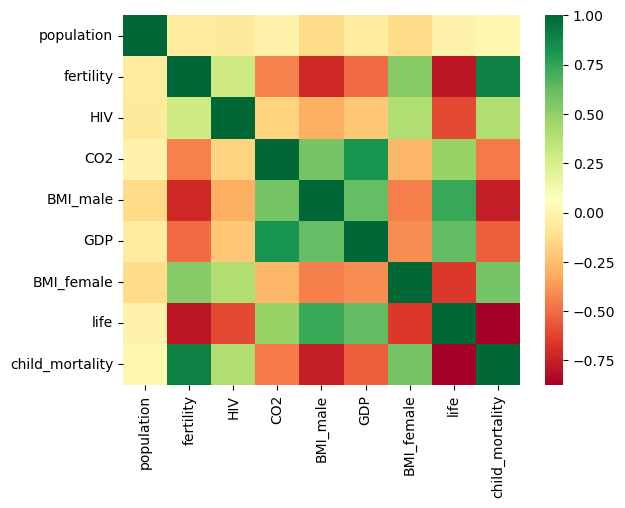

In [11]:
df = pd.read_csv("gapminder.csv")
sns.heatmap(df.corr(), cmap="RdYlGn")

0.6192442167740035


C:\Users\educi\AppData\Local\Temp\ipykernel_7204\1597947544.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\educi\AppData\Local\Temp\ipykernel_7204\1597947544.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
C:\Users\educi\AppData\Local\Temp\ipykernel_7204\1597947544.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')


Text(0, 0.5, 'Life Expectancy')

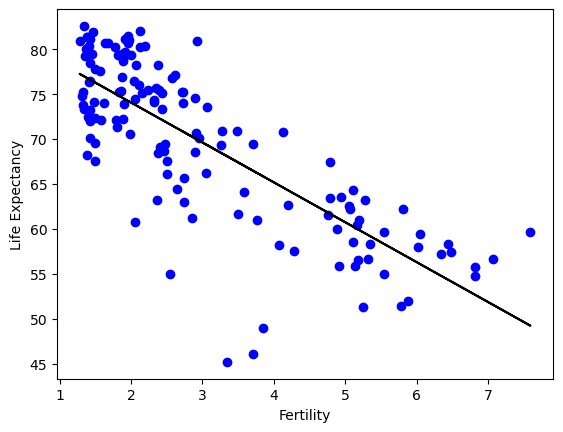

In [12]:
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")

In [13]:
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]
regression.fit(X, y)
print(regression.score(X, y))

0.8974995317332959


In [14]:
cross_val_score(regression, x[:, None], y, cv=5)

C:\Users\educi\AppData\Local\Temp\ipykernel_7204\1933976560.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression, x[:, None], y, cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [15]:
cross_val_score(regression, X, y, cv=5)

array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

In [16]:
# Load creditdata
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head

(284807, 31)


<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

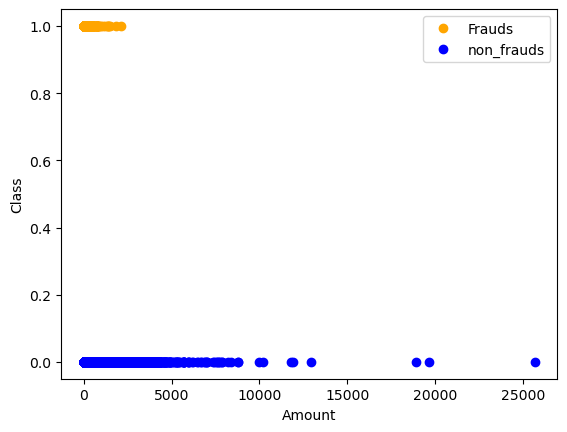

In [17]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
plt.plot(frauds.Amount, frauds.Class, 'o', color='orange', label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color='blue', label="non_frauds")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

C:\Users\educi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

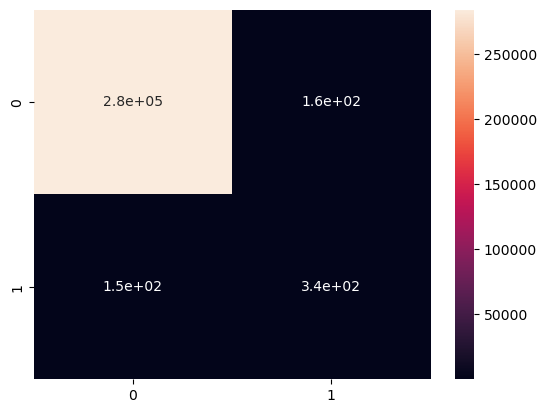

In [18]:
# Logistic Regression
X = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True)